<a href="https://colab.research.google.com/github/nse-yu/colab-ML/blob/main/NNcreate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ニューラルネットワーク構築

In [3]:
import numpy as np

#### Numpyの多次元配列を用いてニューラルネットワークを作る

##### numpyの練習

> １次元配列を作る

In [ ]:
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A)) #配列の次元数を返す  
print(A.shape)

[1 2 3 4]
1
(4,)


> ２次元配列を作る

In [ ]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


> 内積（ドット積）を計算する  
  
<u>内積は行列A,Bについて、Aの列数＝Bの行数が成り立てば計算可能</u>

In [ ]:
# 同じ形状
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])  
print(np.dot(A,B))

[[19 22]
 [43 50]]


In [ ]:
# 違う形状  
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])
print(np.dot(A,B))

[[22 28]
 [49 64]]


##### いざ、実装

> ニューラルネットワーク前提  
  
今回は、バイアスと活性化関数を省略、重みだけがあるとする。

In [ ]:
X = np.array([1,2]) #1×2
W = np.array([[1,3,5],[2,4,6]]) #2×3
print(X.shape,W.shape)  

#内積の計算
Y = np.dot(X,W)
print(Y)

(2,) (2, 3)
[ 5 11 17]


入力層の２つのニューロンそれぞれの重みの行列をW,  
入力層の入力をX,    
各ニューロンへの入力にかけられるバイアスの行列をB,  

隠れ層の３つのニューロンへの入力をAとすると、第一層のニューロンへの入力は、  
***
A = XW + B  
***   
と表すことができる。

In [132]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])  

# 入力層の出力
A1 = np.dot(X,W1) + B1  

第一層への入力を、シグモイド関数で活性化させる。

In [133]:
# シグモイド関数はこれだけでいい
def sigmoid(x):
  return 1/(1+np.exp(-x))    

Z1 = sigmoid(A1)
print(Z1) # 第一層の３つのニューロンそれぞれの活性化関数の出力

[0.57444252 0.66818777 0.75026011]


同様に、第一層から第二層への出力も実装

In [ ]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])  

# 第二層への出力  
A2 = np.dot(Z1,W2) + B2  
Z2 = sigmoid(A2)

最後に、第二層から出力層への出力を実装する  
  
ただし、出力層の活性化関数は、これまでの層とは異なる実装をする。  
*** 
一般的に、ニューラルネットワークでは、解決する問題によって、出力層で用いる活性化関数が異なる。  
分類問題では、一般的には「恒等関数」を、分類問題では「ソフトマックス関数」を用いる。


In [ ]:
# ただ入力をそのまま流すだけの関数（恒等関数）
def identity_function(x):
  return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3) + B3
Y = identity_function(A3) # ここまでが一連の出力

> ここまでの実装をまとめる

In [ ]:
# ニューラルネットワークの各重み、バイアスを初期化する
def init_network():
  network = {}
  network["W1"] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])  
  network["b1"] = np.array([0.1,0.2,0.3])  
  network["W2"] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])  
  network["b2"] = np.array([0.1,0.2])  
  network["W3"] = np.array([[0.1,0.3],[0.2,0.4]])  
  network["b3"] = np.array([0.1,0.2])  
  return network

# ネットワーク計算
def forward(network,x):
  W1,W2,W3 = network["W1"],network["W2"],network["W3"]
  b1,b2,b3 = network["b1"],network["b2"],network["b3"]

  a1 = np.dot(x,W1) + b1
  z1 = sigmoid(a1)

  a2 = np.dot(Z1,W2) + b2
  z2 = sigmoid(a2)

  a3 = np.dot(z2,W3) + b3
  y = identity_function(a3)

  return y  

network = init_network()
x = np.array([1.0,0.5])
y = forward(network,x)
print(y)

[0.31682708 0.69627909]


### MNISTデータセットでニューラルネットワーク

手書き文字の分類をやってみよう。  
用件：<u>ニューロン数</u>  
* 入力層：28×28 = 784  
* 出力層：10クラス分類（0～9）より、10とする  
* 中間層：１つ目（50個）、２つ目（100個）

In [70]:
from tensorflow.keras.datasets import mnist

### 損失関数

> 損失関数

１．平均二乗誤差    
![img](https://assets.st-note.com/production/uploads/images/24199642/picture_pc_00fb7e2e324cd5ef0099cae0c3d775fb.png)  

In [125]:
def mean_squared_error(y,t):
  return 0.5 * sum((y - t) **2)

２．クロスエントロピー誤差  
![img](https://assets.st-note.com/production/uploads/images/24201099/picture_pc_7105dc47dd021e875dfbd2407b0078fc.png)

In [126]:
def cross_entropy_error(y,t):
  if y.ndim == 1:
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)
    batch_size = y.shape[0]
  return -np.sum(t * np.log(y)) / batch_size #-Infを防ぐ微小値delta  
  #バッチまるごと受け取りつつ、バッチサイズ分の平均をとることで、実質１入力の誤差としている。

２つの損失関数を動作比較

In [ ]:
y = [0.1,0.05,0.6,0,0.05,0.3,0.1,0,0,0]
t = [0,0,0,0,0.1,0.05,0.4,0.2,0.0,0]

print(mean_squared_error(np.array(y),np.array(t)))
cross_entropy_error(np.array(y),np.array(t))

0.28375000000000006


4.504424418294715

３．ソフトマックス関数  
![img](https://cdn-ak.f.st-hatena.com/images/fotolife/n/nok-0930-ss/20171203/20171203173559.png)

In [148]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c) # overflow対策
  sum_exp_a = np.sum(exp_a)
  return exp_a / sum_exp_a

## 練習スペース

> 関数定義

In [104]:
def getReprocessData(normalize=False,flatten=True):
  (x_train,t_train),(x_test,t_test) = mnist.load_data()
  #基本的な情報
  print("===========train data===========") 
  print("img  :",x_train.shape) #画像
  print("label: ",t_train.shape) #対応するラベル
  print("============test data===========") 
  print("img  :",x_test.shape) #画像
  print("label:",t_test.shape) #対応するラベル

  if flatten == True:
    print("--------------------------------")
    print(f"processing..... -> fixed: {x_train.shape} ⇔ {x_train.reshape(60000,-1).shape}")
    x_train = x_train.reshape(60000,-1)
    print(f"processing..... -> fixed: {x_test.shape} ⇔ {x_test.reshape(10000,-1).shape}")
    x_test = x_test.reshape(10000,-1)

  if normalize == True and flatten == True:
    print("--------------------------------")
    x_train = x_train/255
    x_test = x_test/255
    print(f"confirm: x_train maxElement = {x_train.max()}, x_test maxElement = {x_test.max()}")
    
  print("------------FINISHED------------")

  return (x_train,t_train),(x_test,t_test)

In [118]:
import pickle
def init_network():
  with open("sample_weight.pkl","rb") as f:
    network = pickle.load(f)
    return network

In [178]:
def predict(network,x,log=True):
  W1,W2,W3 = network["W1"],network["W2"],network["W3"]
  b1,b2,b3 = network["b1"],network["b2"],network["b3"]
  if log == True:
    print("/===============START epoch===============/")
    print(f"W1.shape={W1.shape}, W2.shape={W2.shape}, W3.shape={W3.shape}")
    print(f"b1.shape={b1.shape}, b2.shape={b2.shape}, b3.shape={b3.shape}")
    print(f"In ===> x.shape={x.shape}")

  a1 = np.dot(x,W1) + b1
  z1 = sigmoid(a1)

  a2 = np.dot(z1,W2) + b2
  z2 = sigmoid(a2)

  a3 = np.dot(z2,W3) + b3
  y = softmax(a3)
  if log == True:
    print(f"a2.shape={a2.shape}, z2.shape={z2.shape}")
    print(f"a1.shape={a1.shape}, z1.shape={z1.shape}")
    print(f"a3.shape={a3.shape}, y.shape={y.shape}")

    print("/=============END epoch==============/")

  return y  

> 前処理後のデータを取得

In [ ]:
(x_train,t_train),(x_test,t_test) = getReprocessData(normalize=True)
print(x_train.shape)
print(np.unique(t_train))

> 初期ネットワークの取得

In [ ]:
network = init_network() #重みの初期値が格納されている  
print(network)

> 予測の開始

<u>ベータ版</u>

In [ ]:
accuracy_cnt = 0
for i in range(len(x_test)):
  y = predict(network,x_test[i])
  p = np.argmax(y)
  if p == t_test[i]:
    accuracy_cnt += 1
print("Accuracy:",str(float(accuracy_cnt) / len(x_test)))

<u>ミニバッチ学習版（こっちのほうが何倍も速い）</u>

y_batchのargmaxでaxis=1をしているところについて、  
y_batchの出力は、各繰り返しにおいて、以下のような出力となっている。   

<br> 
result_per_batch = [ [batch_data1], [batch_data2], [...] ]  
※ベータ版では、このbatch_dataを１つ１つ処理していた。  
※batch_dataにも複数の値が含まれており、その最大値を求める。  
<br>
このbatch_dataごとに最大値を出力し、以下のようにするのがaxis=1の役割である。

result_perBatch_max = [ [max1], [max2], [...] ]

In [ ]:
batch_size = 100 #バッチ（入力データの１まとまり）
accuracy_cnt = 0

for i in range(0,len(x_test),batch_size): #テストデータ数
  x_batch = x_test[i:i+batch_size]
  y_batch = predict(network,x_batch,log=False)
  p = np.argmax(y_batch,axis=1) #最大値をもつインデックスを抽出,axis=1により、１バッチの各結果ごとに最大値を取得
  accuracy_cnt += np.sum(p == t_test[i:i+batch_size])
print("Accuracy:",str(float(accuracy_cnt) / len(x_test)))

> 画像表示

In [83]:
import matplotlib.pyplot as plt

> imgデータのみの抽出

In [111]:
img = x_train[1].reshape(28,28) #60000個のうちの１つ

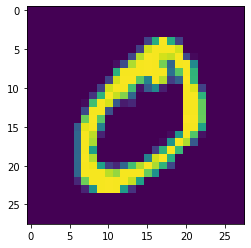

In [112]:
plt.imshow(img)
plt.show()

#### フリースペース

In [182]:
a = np.arange(6).reshape((2,3))+15
print(a)  
b = np.array(0)
print(np.argmax(a))
print(b)

[[15 16 17]
 [18 19 20]]
5
0


In [202]:
np.random.choice(7,size=(1,2),replace=False)

array([[3, 2]])